## Pendulum

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [9]:
b=0.1
def f(state, t):
    X, W = state
    
    dXdt = W
    dWdt = -b * W- np.sin(X)
    
    return dXdt, dWdt

In [13]:
t = np.linspace(0,50,1000)
states = odeint(f, [1, 0], t)

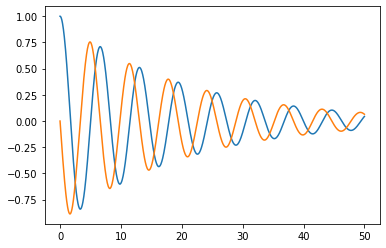

In [17]:
plt.plot(t, states[:,0],t,states[:,1]);

## 손으로 푼 것과 비교
초기 수식에 알파($\frac{g}{L}=1$)와 베타($\beta=0.1$)를 대입하고, $sin\theta = \theta$로 근사하면

초기 수식은 $$y''+0.1y'+y = 0$$라는 식으로 쓸 수 있다. ($\frac{dx}{dt^2}=y''$)

보조 방정식의 근이 $\alpha \pm i\beta$ 꼴로 나오는 미분 방정식이므로

$\alpha \pm i\beta = \frac{-1\pm\sqrt399i}{20}$의 값을 얻는다.

$\therefore$ y=$e^{-x}$$(Ae^{i\sqrt399x}+Be^{-i\sqrt399x})$라는 일반해를 얻는다.

손으로 푼 식은, 보조방정식이 켤레 복소수가 나오는 underdamping 형태로 나온다.

라이브러리로 $sin\theta$를 근사하지 않고 바로 푼 것과는 다른 형태이다.(critical damping)

아마도 $sin\theta$를 $\theta$로 근사한것과 하지 않은 것의 차이인 것 같습니다.

## SIR Model and Basic Reproduction Number


$$\frac{dS}{dt}=-\frac{{\beta}{IS}}{N},\frac{dI}{dt}=\frac{{\beta}{IS}}{N}-{\gamma}{I},\frac{dR}{dt}={\gamma}{I}.$$

위의 수식의 수치해를 구하여라.

## Case I

$$ N=1000, S=999, I=1, \gamma=1, \beta = 3.28$$
COVID-19의 Baic Reproduction Number와 비슷하게 설정하였다.

In [7]:
def func(state, t, N, beta, gamma):
    S, I, R = state
    
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
        
    return dSdt, dIdt, dRdt

In [51]:
beta=3.28
beta_=0.9
gamma=1
total_number=1000
recovered = 0
infected = 1
susceptible = total_number - infected - recovered
days = range(0, 160)

A = odeint(func,[susceptible, infected, recovered],days,args=(total_number, beta, gamma))
S, I, R = A.T

df = pd.DataFrame({
    'suseptible_':S,
    'infected_' : I,
    'recovered_': R,
    'day' : days
})

B = odeint(func,[susceptible, infected, recovered],days,args=(total_number, beta_, gamma))
S, I, R =B.T

df2 = pd.DataFrame({
    'suseptible__':S,
    'infected__':I,
    'recovered__':R,
    'day':days})



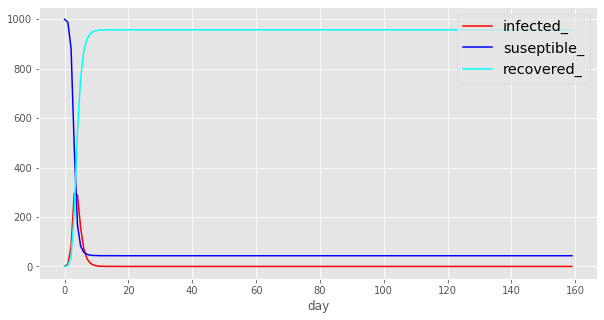

In [44]:
df.plot(x='day', y=['infected_', 'suseptible_','recovered_'], figsize=(10,5), color=['red','blue','aqua'])
plt.legend(loc='upper right', fontsize='x-large')

※코로나 바이러스일 경우에는 치사율은 낮지만, 높은 Basic Reproduction Nuber로 인해 20일 이후에는, 한 번도 감염되지 않은 pure suseptible은 얼마 남지 않은 형태가 된다.

## Case 2 : Beta의 값이 1미만일 때(0.9)


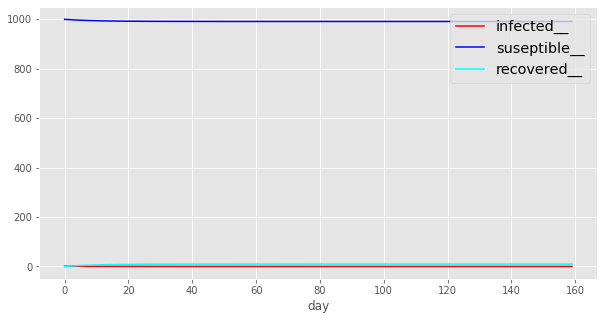

In [52]:
df2.plot(x='day', y=['infected__', 'suseptible__','recovered__'], figsize=(10,5), color=['red','blue','aqua'])
plt.legend(loc='upper right', fontsize='x-large')

Basic Reproduction Number가 1 미만이면 전염병으로 확산되기 어렵다.